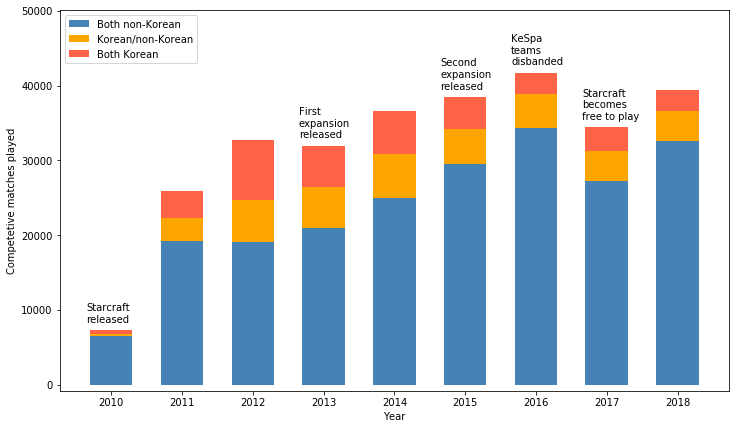

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data
players = pd.read_csv('player_db.csv', low_memory=False)
matches = pd.read_csv('match_db.csv', low_memory=False)

# compute the amount of non-Korean players in any given match 
foreign_players_playing = matches.apply(lambda row: int(players.loc[row['PLAYERA_ID'],'COUNTRY'] != 'KR') + 
                                  int(players.loc[row['PLAYERB_ID'],'COUNTRY'] != 'KR'), axis=1)

# the information necessary for the bar graph 
matches['YEAR'] = matches['DATE'].map(lambda s: int(s[:4]))
foreign_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 2)].groupby('YEAR').size().values
mixed_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 1)].groupby('YEAR').size().values
korean_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 0)].groupby('YEAR').size().values
total_matches_per_year = matches[matches['YEAR'] <= 2018].groupby('YEAR').size()
highest_bar = max(total_matches_per_year.values)

# graph the amount of games in any given year up to 2018
plt.figure(figsize=(12, 7))
bar_width = 0.6
plt.bar(range(2010, 2019), foreign_matches_per_year, width=bar_width, color='steelblue', label="Both non-Korean")
plt.bar(range(2010, 2019), mixed_matches_per_year, bottom=foreign_matches_per_year, 
        width=bar_width, color='orange', label="Korean/non-Korean")
plt.bar(range(2010, 2019), korean_matches_per_year, bottom=(mixed_matches_per_year+foreign_matches_per_year), 
        width=bar_width, color='tomato', label="Both Korean")
text_offset = highest_bar*0.025
plt.annotate(xy=(2009.65, total_matches_per_year[2010] + text_offset), s='Starcraft\nreleased')
plt.annotate(xy=(2012.65, total_matches_per_year[2013] + text_offset), s='First\nexpansion\nreleased')
plt.annotate(xy=(2014.65, total_matches_per_year[2015] + text_offset), s='Second\nexpansion\nreleased')
plt.annotate(xy=(2015.65, total_matches_per_year[2016] + text_offset), s='KeSpa\nteams\ndisbanded')
plt.annotate(xy=(2016.65, total_matches_per_year[2017] + text_offset), s='Starcraft\nbecomes\nfree to play')
plt.ylim(highest_bar* -0.02, highest_bar*1.2)
plt.ylabel('Competetive matches played')
plt.xticks(ticks=(range(2010, 2019)))
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()